# Road Segmentation Project
#### CS433 ML - Project 2
#### Team: OGPteam2

## Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd gdrive/MyDrive/ml-project-2-ogpteam2/

/content/gdrive/MyDrive/ml-project-2-ogpteam2


In [6]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
import tensorflow.python.platform
import tensorflow as tf
from data_loading import *
from data_handling import *
from data_prep import *
from Image_augmentation import image_augmentation
%load_ext autoreload
%autoreload 2



In [4]:
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

## Data Loading

In [7]:
# Load data and labels (images and groundtruth)
data_dir = 'Data/training/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/' 

TRAINING_SIZE = 1 # number of images to be used

# Extract it into numpy arrays.
train_data = extract_data(train_data_filename, TRAINING_SIZE)
train_labels = extract_labels(train_labels_filename, TRAINING_SIZE)


Loading Data/training/images/satImage_001.png
Loading Data/training/groundtruth/satImage_001.png


In [16]:
train_data.shape

(6250, 16, 16, 3)

## Data Preprocessing

In [6]:
c0 = 0  # bgrd
c1 = 0  # road
index_of_0s = []
index_of_1s = []
for i in range(len(train_labels)):
    if train_labels[i][0] == 1:
        c0 = c0 + 1
        index_of_0s.append(i)
    else:
        c1 = c1 + 1
        index_of_0s.append(i)
print('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

Number of data points per class: c0 = 4422 c1 = 1828


We have an imbalanced dataset, so we consider both under-sampling and over-sampling

In [7]:
new_train_data, new_train_labels = oversample(train_data, train_labels, index_of_1s, index_of_0s)


In [8]:
c0 = 0  # bgrd
c1 = 0  # road
for i in range(len(new_train_labels)):
    if new_train_labels[i][0] == 1:
        c0 = c0 + 1
    else:
        c1 = c1 + 1
print('Number of data points per class: c0 = ' + str(c0) + ' c1 = ' + str(c1))

Number of data points per class: c0 = 4422 c1 = 4422


In [ ]:
train_labels.shape

(12500, 2)

In [ ]:
train_data.shape

(12500, 16, 16, 3)

In [ ]:
## Init parameters 

In [ ]:
init_param()

## Image Augmentation

In [14]:
image_augmentation(train_data_filename, train_labels_filename, 1, False, False, False, True, False)

Loading Data/training/images/satImage_001.png
Loading Data/training/groundtruth/satImage_001.png
Performing data augmentation on satImage_001...


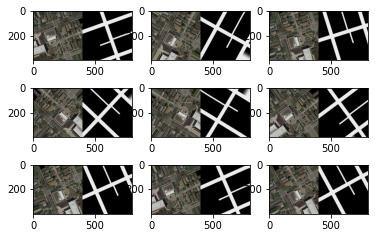

In [49]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# seed definition
seed = 453
# load the image
img = load_img(train_data_filename + "satImage_002.png")
mask = load_img(train_labels_filename + "satImage_002.png")
# convert to numpy array
data = img_to_array(img)
mask_data = img_to_array(mask)
# expand dimension to one sample
samples_img = expand_dims(data, 0)
samples_mask = expand_dims(mask_data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
datagen_mask = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  batch_mask = it_mask.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  mask_image = batch_mask[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(concatenate_images(image, mask_image))
# show the figure
pyplot.show()

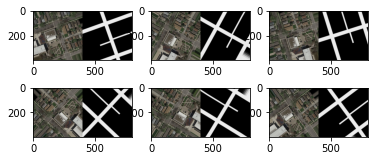

In [59]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# seed definition
seed = 453
# load the image
img = load_img(train_data_filename + "satImage_002.png")
mask = load_img(train_labels_filename + "satImage_002.png")
# convert to numpy array
data = img_to_array(img)
mask_data = img_to_array(mask)
# expand dimension to one sample
samples_img = expand_dims(data, 0)
samples_mask = expand_dims(mask_data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
datagen_mask = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate samples and plot
for i in range(6):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  batch_mask = it_mask.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  mask_image = batch_mask[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(concatenate_images(image, mask_image))
# show the figure
pyplot.show()

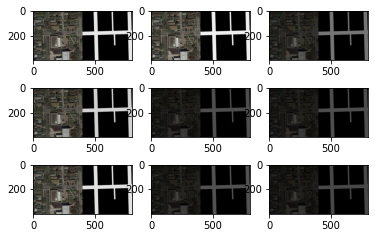

In [50]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# seed definition
seed = 453
# load the image
img = load_img(train_data_filename + "satImage_002.png")
mask = load_img(train_labels_filename + "satImage_002.png")
# convert to numpy array
data = img_to_array(img)
mask_data = img_to_array(mask)
# expand dimension to one sample
samples_img = expand_dims(data, 0)
samples_mask = expand_dims(mask_data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
datagen_mask = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  batch_mask = it_mask.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  mask_image = batch_mask[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(concatenate_images(image, mask_image))
# show the figure
pyplot.show()

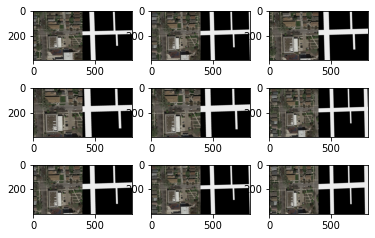

In [53]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# seed definition
seed = 453
# load the image
img = load_img(train_data_filename + "satImage_002.png")
mask = load_img(train_labels_filename + "satImage_002.png")
# convert to numpy array
data = img_to_array(img)
mask_data = img_to_array(mask)
# expand dimension to one sample
samples_img = expand_dims(data, 0)
samples_mask = expand_dims(mask_data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
datagen_mask = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples_img, batch_size=1, seed=seed)
it_mask = datagen.flow(samples_mask, batch_size=1, seed=seed)
# generate samples and plot
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  batch_mask = it_mask.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  mask_image = batch_mask[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(concatenate_images(image, mask_image))
# show the figure
pyplot.show()

## Training

In [ ]:
def train(model, criterion, dataset_train, dataset_test, optimizer, num_epochs):
  """
  @param model: torch.nn.Module
  @param criterion: torch.nn.modules.loss._Loss
  @param dataset_train: torch.utils.data.DataLoader
  @param dataset_test: torch.utils.data.DataLoader
  @param optimizer: torch.optim.Optimizer
  @param num_epochs: int
  """
  print("Starting training")
  
  for epoch in range(num_epochs):
    # Train an epoch
    model.train()
    for batch_x, batch_y in dataset_train:
      batch_x, batch_y = batch_x.to(device), batch_y.to(device)

      # Evaluate the network (forward pass)
      prediction = model(batch_x)
      loss = criterion(prediction, batch_y)
      
      # Compute the gradient
      optimizer.zero_grad()
      loss.backward()

      # Update the parameters of the model with a gradient step
      optimizer.step()

    # Test the quality on the test set
    model.eval()
    accuracies_test = []
    for batch_x, batch_y in dataset_test:
      batch_x, batch_y = batch_x.to(device), batch_y.to(device)

      # Evaluate the network (forward pass)
      prediction = model(batch_x)
      accuracies_test.append(accuracy(prediction, batch_y))

    print("Epoch {} | Test accuracy: {:.5f}".format(epoch, sum(accuracies_test).item()/len(accuracies_test)))

In [ ]:
num_epochs = 10
learning_rate = 1e-3
batch_size = 1000

dataset_test = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data', train=False, download=True, transform=torchvision.transforms.ToTensor()), 
  batch_size=100,
  shuffle=True
)
dataset_train = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data', train=True, download=True, transform=torchvision.transforms.ToTensor()),
  batch_size=batch_size,
  shuffle=True
)

# If a GPU is available (should be on Colab, we will use it)
if not torch.cuda.is_available():
  raise Exception("Things will go much quicker if you enable a GPU in Colab under 'Runtime / Change Runtime Type'")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train the logistic regression model with the Adam optimizer
criterion = torch.nn.CrossEntropyLoss() # this includes LogSoftmax which executes a logistic transformation
model_logreg = LogisticRegressionModel().to(device)

optimizer = torch.optim.Adam(model_logreg.parameters(), lr=learning_rate)
train(model_logreg, criterion, dataset_train, dataset_test, optimizer, num_epochs)